In [1]:
from shared import *
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)

## Wearables Sales Prices
Based on median sales prices on the Aavegotchi Baazaar during the report dates.

In [2]:
column_name_mappings = {'name': 'Wearable', 'price': 'Median Price (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month', 'lastPrice': 'Last Sale Price (GHST)', 'marketCap': 'Market Cap (GHST)', 'maxQuantity': 'Total Supply'}

def get_median_price_by_column(column_name):
    return purchases_types_df.pivot_table(index=column_name,values=['price'],aggfunc=np.median,margins=False).reset_index().rename(columns=column_name_mappings)


price_by_name_df = get_median_price_by_column('name')
price_by_slot_df = get_median_price_by_column('slotNames')
price_by_rarity_df = get_median_price_by_column('rarity')
price_by_month_df = get_median_price_by_column('yearMonthPurchased')[:-1]
price_by_month_rarity_df = purchases_types_df.pivot_table(index='yearMonthPurchased', columns='rarity', values=['price'],aggfunc=np.median,margins=False).reset_index().rename(columns=column_name_mappings).fillna(0)[:-1]
rarities = ['common', 'uncommon', 'rare', 'legendary', 'mythical', 'godlike']
price_by_month_rarity_df.columns = [col[1] for col in price_by_month_rarity_df.columns]
price_by_month_rarity_df.columns = ['Month'] + price_by_month_rarity_df.columns[1:].tolist()

In [3]:
show_itable(price_by_rarity_df, order=[[1, 'asc']])

### Median Price Over Time
Median price (in GHST) for sales of each rarity by month during the reporting period.

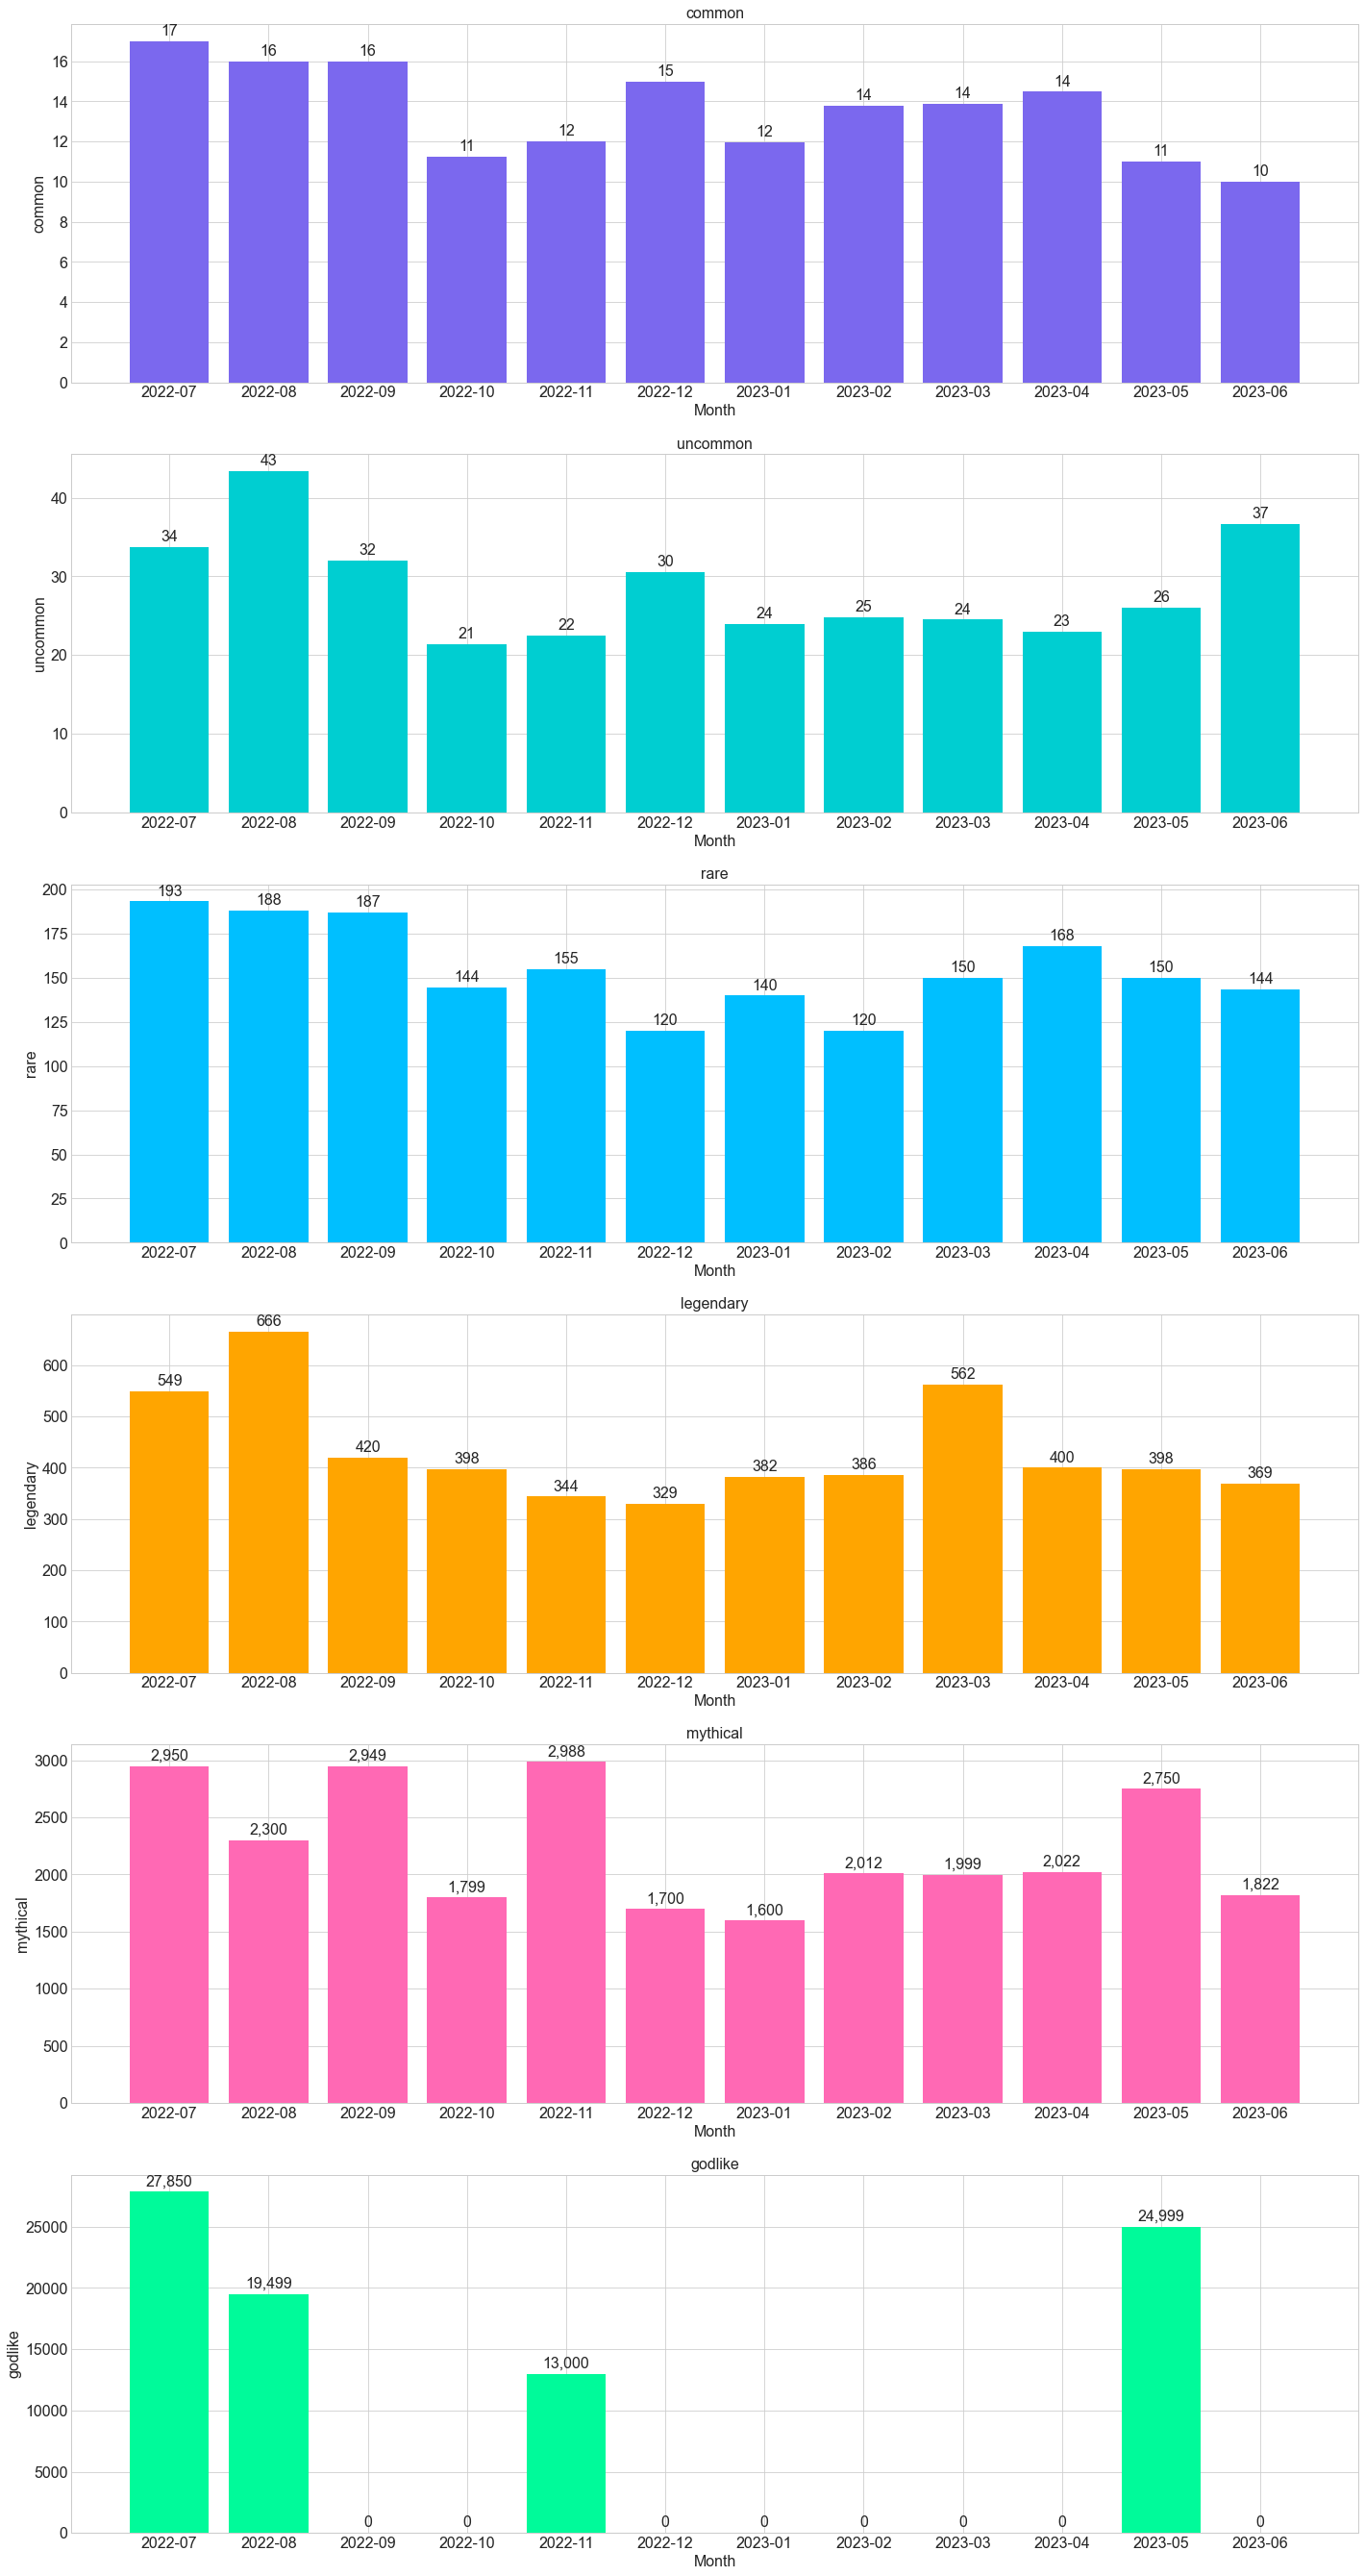

In [4]:
fig, ax =get_bar_charts(price_by_month_rarity_df, 'Month', rarities, colors=list(rarity_color_mappings.values()))

### Median Price by Wearable
Median sales price of individual wearables during the reporting period. Wearables without a sale are omitted.

In [5]:
show_itable_long(price_by_name_df, order=[[1, 'asc']])